In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('weight-height.csv')

In [4]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.Height.std()

3.8514544315772765

In [7]:
df.Height.var()

14.833701238516243

In [8]:
df.Height.mean()

66.80992512908925

In [9]:
df.Height.median()

66.98592338

In [10]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [12]:
df.shape

(8555, 3)

In [13]:
df.corr()

,Height,Weight
Height,1.000000,0.922975
Weight,0.922975,1.000000


# Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st=StandardScaler()

In [19]:
df.Height=st.fit_transform(df[['Height']])

In [20]:
df.head()

,Gender,Height,Weight
0,Male,1.827233,241.893563
1,Male,0.512039,162.310473
2,Male,1.895545,212.740856
3,Male,1.277788,220.042470
4,Male,0.797634,206.349801


In [21]:
df.tail()

,Gender,Height,Weight
8550,Female,-1.642587,110.565497
8551,Female,-0.879344,129.921671
8552,Female,-0.318306,155.942671
8553,Female,0.161000,151.678405
8554,Female,-1.528897,131.253738


In [22]:
df.Height.mean()

-1.1328038319056681e-15

In [23]:
df.Height.std()

1.0000584504778822

# skewness and Standard deviation

In [24]:
df=pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


# Outlier Removal

In [26]:
mean=df.Height.mean()

In [27]:
std=df.Height.std()

In [28]:
mean

66.80992512908925

In [29]:
std

3.8514544315772765

<AxesSubplot:xlabel='Height', ylabel='Count'>

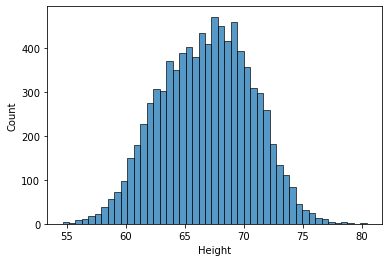

In [30]:
sns.histplot(df.Height)   #sns.histplot(df['Height']

<AxesSubplot:xlabel='Height', ylabel='Count'>

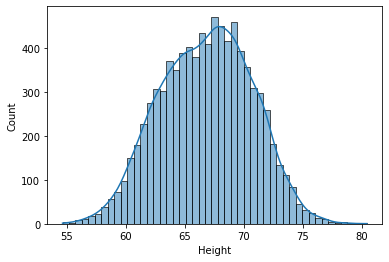

In [31]:
sns.histplot(df['Height'],kde=True)

In [32]:
std2=mean+(std*2)

In [33]:
std2

74.5128339922438

<AxesSubplot:xlabel='Weight', ylabel='Count'>

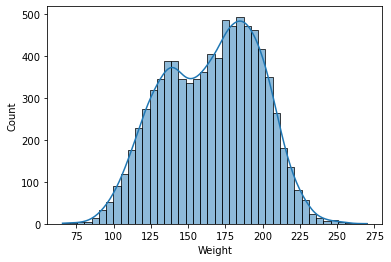

In [34]:
sns.histplot(df['Weight'],kde=True)

# outlier removal for Weight

In [35]:
mean=df.Weight.mean()

In [36]:
std=df.Weight.std()

In [37]:
std3=mean+(std*3)

In [38]:
std3

261.7645019783223

In [39]:
std_3=mean-(std*3)
std_3

69.50096867502938

In [40]:
remove1=df[(df['Weight']>std_3) & (df['Weight']<std3)]

In [41]:
remove1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [42]:
remove1.shape

(8551, 3)

In [43]:
df.shape

(8555, 3)

In [45]:
df[(df['Weight']<std_3) | (df['Weight']>std3)]

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
2014,Male,78.998742,269.989698
5360,Female,55.668202,68.982530


# for  2 sigma

In [46]:
std2=mean+(std*2)

In [47]:
std_2=mean-(std*2)

In [48]:
remove2=df[(df['Weight']>std_2) & (df['Weight']<std2)]

In [49]:
remove2

,Gender,Height,Weight
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [50]:
df[(df['Weight']<std_2) | (df['Weight']>std2)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
82,Male,73.826127,237.916736
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
190,Male,76.709835,235.035419
...,...,...,...
8357,Female,60.000657,95.625638
8363,Female,59.408341,101.217203
8364,Female,60.575315,99.286298
8442,Female,61.318284,97.107504


In [51]:
remove2.shape

(8345, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

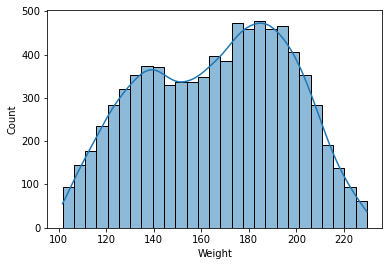

In [52]:
sns.histplot(remove2['Weight'],kde=True)

# Z-Scores

In [53]:
df=pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [54]:
df.shape

(8555, 3)

In [55]:
df['Z_scores']=(df.Weight-df.Weight.mean())/df.Weight.std()

In [56]:
df

,Gender,Height,Weight,Z_scores
0,Male,73.847017,241.893563,2.379884
1,Male,68.781904,162.310473,-0.103678
2,Male,74.110105,212.740856,1.470111
3,Male,71.730978,220.042470,1.697974
4,Male,69.881796,206.349801,1.270664
...,...,...,...,...
8550,Female,60.483946,110.565497,-1.718492
8551,Female,63.423372,129.921671,-1.114441
8552,Female,65.584057,155.942671,-0.302399
8553,Female,67.429971,151.678405,-0.435475


In [57]:
df.Z_scores.max()

3.256685073254194

In [58]:
df.Z_scores.min()

-3.1161208871312986

In [59]:
df[df['Z_scores']>3]

,Gender,Height,Weight,Z_scores
2014,Male,78.998742,269.989698,3.256685


In [63]:
df[df['Z_scores']<-3]

,Gender,Height,Weight,Z_scores
151,Male,65.350411,65.78000,-3.116121
160,Male,64.333648,68.64000,-3.026868
5360,Female,55.668202,68.98253,-3.016179


In [64]:
remove3=df[(df['Z_scores']<3) &(df['Z_scores']>-3) ]

In [65]:
remove3

,Gender,Height,Weight,Z_scores
0,Male,73.847017,241.893563,2.379884
1,Male,68.781904,162.310473,-0.103678
2,Male,74.110105,212.740856,1.470111
3,Male,71.730978,220.042470,1.697974
4,Male,69.881796,206.349801,1.270664
...,...,...,...,...
8550,Female,60.483946,110.565497,-1.718492
8551,Female,63.423372,129.921671,-1.114441
8552,Female,65.584057,155.942671,-0.302399
8553,Female,67.429971,151.678405,-0.435475


In [66]:
remove3.shape

(8551, 4)

In [70]:
df[(df['Z_scores']>3) | (df['Z_scores']<-3) ]

,Gender,Height,Weight,Z_scores
151,Male,65.350411,65.780000,-3.116121
160,Male,64.333648,68.640000,-3.026868
2014,Male,78.998742,269.989698,3.256685
5360,Female,55.668202,68.982530,-3.016179
